In [1]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
themes = get_themes()
set_nb_theme(themes[1])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, spearmanr, pearsonr

# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
%matplotlib inline
%load_ext watermark
%load_ext autoreload 
%autoreload 2

%watermark -a 'Ethen' -d -t -v -p numpy,matplotlib,jupyterthemes

Ethen 2017-02-05 15:35:19 

CPython 3.5.2
IPython 4.2.0

numpy 1.12.0
matplotlib 2.0.0
jupyterthemes 0.13.9


# Correlation

A correlation coefficient measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship. The two most popular types of correlation are **Pearson correlation** and **Spearman correlation**.

The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a constant proportional change in the other variable. On the other hand, the Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

The Pearson and Spearman correlation coefficients can range in value from −1 to +1. For the Pearson correlation coefficient to be +1, when one variable increases then the other variable increases by a consistent amount. This relationship forms a perfect line. The Spearman correlation coefficient is also +1 in this case.

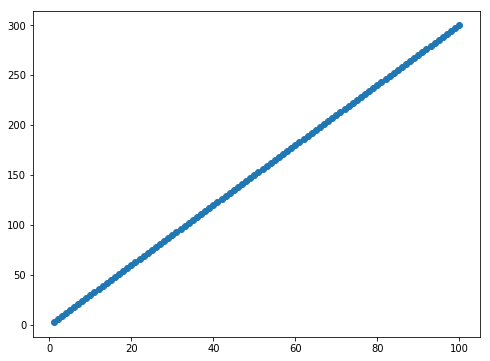

In [3]:
plt.rcParams['figure.figsize'] = 8, 6

# y1 is simply 3 times x, so 1 unit
# increase in x increases y by 3 unit
x = np.arange(1, 101)
y1 = 3 * x
plt.scatter(x, y1)
plt.show()

In [4]:
print( 'pearson: ', pearsonr(x, x)[0] )
print( 'spearman: ', spearmanr(x, x)[0] )

pearson:  1.0
spearman:  1.0


If the relationship is that one variable increases when the other increases, but the amount is not consistent, the Pearson correlation coefficient is positive but less than +1. The Spearman coefficient still equals +1 in this case.

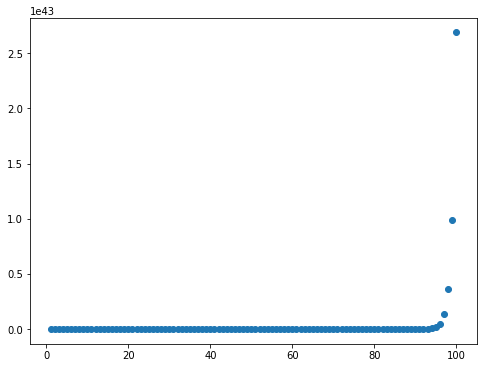

In [5]:
# y2 is the exponential of x,
# thus the despite the fact that
# y2 will increase when x is increased
# by a unit, but the relationship is not a constant
y2 = np.exp(x)
plt.scatter(x, y2)
plt.show()

In [6]:
print( 'pearson: ', pearsonr(x, y2)[0] )
print( 'spearman: ', spearmanr(x, y2)[0] )

pearson:  0.252032033904
spearman:  1.0


The idea can be generalized to negative relationships and when a relationship is random or non-existent, then both correlation coefficients are nearly zero.

It is always a good idea to examine the relationship between variables with a scatterplot. Correlation coefficients only measure linear (Pearson) or monotonic (Spearman) relationships. Other relationships are possible.

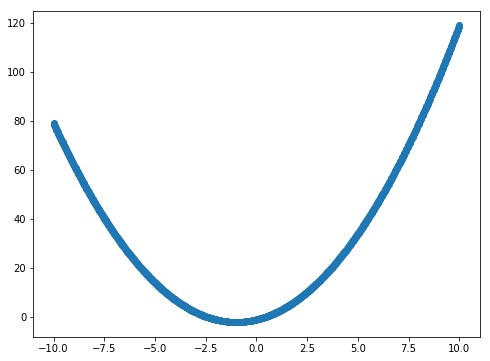

In [9]:
# create 1000 equally spaced points between -10 and 10
# calculate the y value for each element of the x vector
x3 = np.linspace(-10, 10, 1000)
y3 = x3 ** 2 + 2 * x3 + np.random.normal(loc = 0, scale = 5)
plt.scatter(x3, y3)
plt.show()

In [16]:
print( 'pearson: ', pearsonr(x3, y3)[0] )
print( 'spearman: ', spearmanr(x3, y3)[0] )

pearson:  0.360844075487
spearman:  0.269785169785


From the plot above, we can see an obvious parabola relationship, thus the Pearson coefficient and Spearman coefficient will not be very helpful in discovering the pattern.

To understand how Spearman coefficient is calculated, we need to know that it is a rank correlation coefficient. Rank correlations are performed on ranks instead of the raw data itself. This can be very advantageous when dealing with data with outliers. For example, given two sets of data, say x = [5.05, 6.75, 3.21, 2.66] and y = [1.65, 26.5, -5.93, 7.96], with some ordering (here numerical) we can give them the ranks [3, 4, 2, 1] and [2, 4, 1, 3] respectively.

Tied ranks are usually assigned using the midrank method, whereby those entries receive the mean of the ranks they would have received had they not been tied. Thus z = [1.65, 2.64, 2.64, 6.95] would yield ranks [1, 2.5, 2.5, 4] using the midrank method.

In [7]:
x = [5.05, 6.75, 3.21, 2.66]
rankdata(x)

array([ 3.,  4.,  2.,  1.])

In [8]:
# the default method is average (tied rank)
z = [1.65, 2.64, 2.64, 6.95]
rankdata(z, method = 'average')

array([ 1. ,  2.5,  2.5,  4. ])

After obtaining the rank of the data, we can then use the following formula to perform the computation.

\begin{align}
\rho &= 1 - \frac{6 \sum_i (d_i)^2 }{ n(n^2 - 1) }
\end{align}

Where $d$ is the difference between the two ranks and $n$ is the number of elements in the vector.

In [22]:
def compute_spearman(a, b):
    """pass in the two vectors a and b"""
    rank1 = rankdata(a)
    rank2 = rankdata(b)
    n = rank1.shape[0]
    spearman = 1 - 6 * np.sum( (rank2 - rank1) ** 2 ) / ( n * (n ** 2 - 1) )
    return spearman

In [23]:
compute_spearman(x3, y3)

0.26978516978516975

## Reference

- [Blog: Using Python (and R) to calculate Rank Correlations](http://www2.warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/rank_correlations/)
- [Blog: Spearman Rank Correlation (Spearman’s Rho): Definition and How to Calculate it](http://www.statisticshowto.com/spearman-rank-correlation-definition-calculate/)
- [StackExchange: How to choose between Pearson and Spearman correlation?](http://stats.stackexchange.com/questions/8071/how-to-choose-between-pearson-and-spearman-correlation)
- [Minitab Support: A comparison of the Pearson and Spearman correlation methods](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)